In [4]:
# Download Dataset
# https://www.kaggle.com/datasets/mohamedhanyyy/chest-ctscan-images

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Part 1
#### Importing libraries

In [1]:
import torch
import torchvision
from PIL import Image
import torch.nn as nn
from torch.optim import SGD
from datetime import datetime
import matplotlib.pyplot as plt
from torchvision import transforms

# Part 2
#### loading train data

In [9]:
# تعیین مسیر پوشه داده
train_data_dir = './Data/train'

# تعریف تبدیل های مورد نیاز
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])


# ساخت دیتاسِت
train_dataset = torchvision.datasets.ImageFolder(train_data_dir, transform=transform)

# ساخت دیتالودر برای بارگیری داده ها به صورت دسته ای
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=1, shuffle=False)

# Access the classes attribute of the train_dataset
class_names = train_dataset.classes

# Print the names of the classes
print(class_names)

# بررسی شکل تنسورها و لیبل ها
for images, labels in train_dataloader:
    print("Shape of images:", (images.shape))
    print("Labels:", labels)
    print("----------------------")
    break

Shape of images: torch.Size([1, 3, 224, 224])
Labels: tensor([0])
----------------------


# Part 3
#### Implementing CNN model

In [10]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()

        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)


        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()


        self.fc1 = nn.Linear(50176, 64)
        self.fc2 = nn.Linear(64, 2)


    def forward(self, x):
        #layer 1
        y = self.conv1(x)
        y = self.relu(y)
        y = self.pool(y)

        #layer 2
        y = self.conv2(y)
        y = self.relu(y)
        y = self.pool(y)

        #layer 3
        y = self.conv3(y)
        y = self.relu(y)
        y = self.pool(y)

        #layer 3
        y = self.flatten(y)
        y = self.fc1(y)
        y = self.fc2(y)

        return y

# چاپ معماری مدل
print(CNNModel())

CNNModel(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=50176, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=2, bias=True)
)


# Part 4
#### Creating an object from the model and Implementation of optimizer and loss function

In [11]:
# CNNmodel
model = CNNModel()

# optimizer
learning_rate = 0.001
model_optimizer = SGD(model.parameters(), lr=learning_rate)

# loss function
criterion = nn.CrossEntropyLoss()

In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cpu


CNNModel(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=50176, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=2, bias=True)
)

# Part 5
#### Train Time

In [13]:
losses = []
def train(dataset):

    now = datetime.now()
    current_time = now.strftime("%H:%M:%S")
    print("Current Time =", current_time)

    epoch_number = 1
    for epoch in range(20):
        for image, label in dataset:

            image = image.to(device)
            label = label.to(device)

            model_optimizer.zero_grad()

            # make a predict
            prediction = model(image)

            # calculate loss
            loss = criterion(prediction, label)

            loss.backward()

            # update weights
            model_optimizer.step()


        print(f"[Epoch] [{epoch_number}](+): {loss.item()}")
        losses.append(loss.item())

        epoch_number += 1

    now = datetime.now()
    current_time = now.strftime("%H:%M:%S")
    print("Current Time =", current_time)

In [14]:
train(train_dataloader)

Current Time = 17:05:41
[Epoch] [1](+): 0.013039321638643742
[Epoch] [2](+): 0.0035163257271051407
[Epoch] [3](+): 0.0008811643347144127
[Epoch] [4](+): 0.00024375328212045133
[Epoch] [5](+): 7.998623186722398e-05
[Epoch] [6](+): 3.218599158572033e-05
[Epoch] [7](+): 1.6093124941107817e-05
[Epoch] [8](+): 9.536697689327411e-06
[Epoch] [9](+): 6.437280717364047e-06
[Epoch] [10](+): 4.887569048150908e-06
[Epoch] [11](+): 4.0531076592742465e-06
[Epoch] [12](+): 3.576272320060525e-06
[Epoch] [13](+): 3.4570634852570947e-06
[Epoch] [14](+): 3.576272320060525e-06
[Epoch] [15](+): 4.0531076592742465e-06
[Epoch] [16](+): 4.887569048150908e-06
[Epoch] [17](+): 6.318072337307967e-06
[Epoch] [18](+): 8.34461570775602e-06
[Epoch] [19](+): 1.0967194612021558e-05
[Epoch] [20](+): 1.3828182090946939e-05
Current Time = 17:15:56


# Part 6
#### Ploting the losses

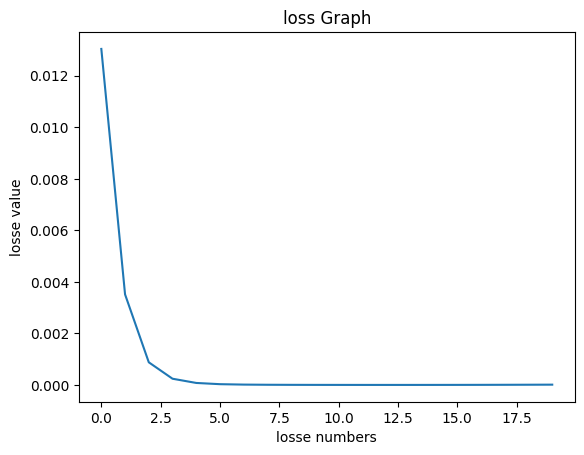

In [15]:
losses_number = []

for i in range(len(losses)):
    losses_number.append((i))


plt.plot(losses_number, losses)


plt.xlabel('losse numbers')
plt.ylabel('losse value')
plt.title('loss Graph')


plt.show()

# Part 7
#### Saving model

In [16]:
# saving the model
torch.save(model.state_dict(), 'model.pt')

# Part 8
#### Evaluating and testing model accuracy

In [17]:
test_data_dir = './Data/test'


transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])


test_dataset = torchvision.datasets.ImageFolder(test_data_dir, transform=transform)


test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=False)


corrects = []
wrongs = []
for image, label in test_dataloader:
    image = image.to(device)
    label = label.to(device)

    with torch.no_grad():
        pred_label = model(image)
        _, pred_label = torch.max(pred_label, 1)

    if label == pred_label:
        corrects.append(1)
    else:
        wrongs.append(1)
    print("real label:" , label)
    print("pred label:" , pred_label)

    print('(+)==========================')

print("corrects: ",len(corrects))
print("wrongs: ",len(wrongs))
print("accuracy: ", (len(corrects) / (len(corrects) + len(wrongs))))

real label: tensor([0])
pred label: tensor([1])
(+)==========================
real label: tensor([0])
pred label: tensor([0])
(+)==========================
real label: tensor([0])
pred label: tensor([0])
(+)==========================
real label: tensor([0])
pred label: tensor([0])
(+)==========================
real label: tensor([0])
pred label: tensor([0])
(+)==========================
real label: tensor([0])
pred label: tensor([0])
(+)==========================
real label: tensor([0])
pred label: tensor([1])
(+)==========================
real label: tensor([0])
pred label: tensor([1])
(+)==========================
real label: tensor([0])
pred label: tensor([0])
(+)==========================
real label: tensor([0])
pred label: tensor([1])
(+)==========================
real label: tensor([0])
pred label: tensor([0])
(+)==========================
real label: tensor([0])
pred label: tensor([0])
(+)==========================
real label: tensor([0])
pred label: tensor([0])
(+)=============

In [18]:
# find Best epoch

print("Minimum Index position: ",losses.index(min(losses)))

Minimum Index position:  12
